In [70]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_style()

from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [143]:
frp = Material('FRP', 600e6, 80e9, 'black')
confining_steel = Steel('Confining Steel', 200e9, 500e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 200e9, 500e6, 'blue')
concrete = Concrete('Concrete', 37e9, 40e6, 'gray', None)


# test_concrete_section = HollowRectangular(concrete, 0.600, 0.600, 0.34, 0.34, 0.130)
# test_concrete_section.add_reinforcements(steel, 0.016, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.1825,0.065) , (0.065,0.1825) , (0.535,0.1825) , (0.1825,0.535) , (0.3,0.065) , (0.065,0.3) , (0.3,0.535) , (0.535,0.3) , (0.4175,0.065) , (0.065,0.4175) , (0.4175,0.535) , (0.535,0.4175)
# ])
# test_section = Rectangular(concrete, 0.35, 0.35)
# test_section.add_reinforcements(reinf_steel,0.025, [(0.05,0.05) , (0.3,0.05) , (0.05,0.3) , (0.3,0.3) , (0.133333333333333,0.05)  , (0.133333333333333,0.3) , (0.216666666666667,0.05)  , (0.216666666666667,0.3)
#   ])
 
test_outer_steel = HollowRectangular(confining_steel, 0.4, 0.2, 0.3, 0.1, 0, 0)
test_concrete = HollowRectangular(concrete, 0.3, 0.1, 0.2, 0, 0.05, 0.05)

# test_concrete = HollowCircular(concrete, 0.5, 0.05, 0.3, 0.3)
# test_inner_steel = HollowCircular(confining_steel, 0.4, 0.05, 0.3, 0.3)

test_section = test_outer_steel +test_concrete #+ test_inner_steel



test_section_concrete = HollowRectangular(concrete,0.400,0.400,0.300,0.300,0)
# test_section_steel = HollowRectangular(confining_steel,0.500,0.500,0.400,0.400,0)
# test_section = test_section_concrete + test_section_steel
# # test_concrete_section.add_reinforcements(steel,0.032, [(0.065,0.065) , (0.335,0.065) , (0.065,0.335) , (0.335,0.335) , (0.1325,0.065) , (0.065,0.1325) , (0.335,0.1325) , (0.1325,0.335) , (0.2,0.065) , (0.065,0.2) , (0.2,0.335) , (0.335,0.2)
# #       ])

# test_concrete_section = HollowCircular(steel,0.60,0.02,0.3,0.3)
# test_concrete_section.add_reinforcements(concrete, 0.032, [(0.065,0.065) , (0.535,0.065) , (0.065,0.535) , (0.535,0.535) , (0.221666666666667,0.065) , (0.065,0.221666666666667) , (0.535,0.221666666666667) , (0.221666666666667,0.535) , (0.378333333333333,0.065) , (0.065,0.378333333333333) , (0.378333333333333,0.535) , (0.535,0.378333333333333)
#            ])


In [144]:
test_section.generate_slices()
test_section.calculate_neutral_axis(2011.2e3, concrete, reinf_steel)
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices



Neutral axis: 0.13770661188095223


,height,mid_height,Steel_area,Concrete_area,strain,steel_stress,concrete_stress,steel_force,concrete_force,total_force,total_moment,steel_moment
0,0.0005,0.00025,0.00005,0.00015,0.003494,4.347826e+08,2.266667e+07,21739.130435,3400.0,25139.130435,2507.628261,2168.478261
1,0.0010,0.00075,0.00005,0.00015,0.003481,4.347826e+08,2.266667e+07,21739.130435,3400.0,25139.130435,2495.058696,2157.608696
2,0.0015,0.00125,0.00005,0.00015,0.003468,4.347826e+08,2.266667e+07,21739.130435,3400.0,25139.130435,2482.489130,2146.739130
3,0.0020,0.00175,0.00005,0.00015,0.003456,4.347826e+08,2.266667e+07,21739.130435,3400.0,25139.130435,2469.919565,2135.869565
4,0.0025,0.00225,0.00005,0.00015,0.003443,4.347826e+08,2.266667e+07,21739.130435,3400.0,25139.130435,2457.350000,2125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.1975,0.19725,0.00020,0.00000,-0.001513,-3.026752e+08,0.000000e+00,-60535.038147,0.0,-60535.038147,5887.032460,5887.032460
395,0.1980,0.19775,0.00020,0.00000,-0.001526,-3.052168e+08,0.000000e+00,-61043.365240,0.0,-61043.365240,5966.988952,5966.988952
396,0.1985,0.19825,0.00020,0.00000,-0.001539,-3.077585e+08,0.000000e+00,-61551.692333,0.0,-61551.692333,6047.453772,6047.453772
397,0.1990,0.19875,0.00020,0.00000,-0.001552,-3.103001e+08,0.000000e+00,-62060.019426,0.0,-62060.019426,6128.426918,6128.426918


In [145]:
print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
print(f"Sum Concrete Area: {test_section.slices.Concrete_area.sum():.6f} m^2")
print(f"Sum Steel Area: {test_section.slices.Steel_area.sum():.6f} m^2")
print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
print(f"Steel Force: {test_section.slices.steel_force.sum():.2f} Nm")
print(f"Concrete Force: {test_section.slices.concrete_force.sum():.2f} Nm")


Sum Moment: 529999.46 Nm
Sum Concrete Area: 0.029850 m^2
Sum Steel Area: 0.049950 m^2
Sum Force: 2011199.22 Nm
Steel Force: 1358884.99 Nm
Concrete Force: 652314.23 Nm


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


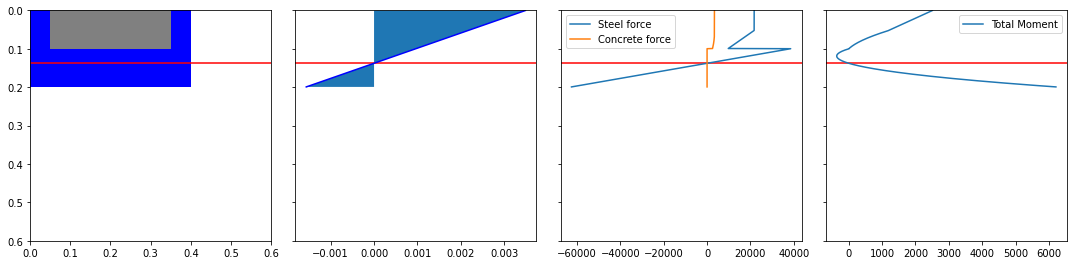

In [146]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(16, 4))
                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,0.6)
axs[0].set_xlim(0,0.6)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)

axs[2].plot(
    slices.steel_force,
    slices.mid_height,
    label = "Steel force"
)
axs[2].plot(
    slices.concrete_force,
    slices.mid_height,
    label = "Concrete force"
)
axs[2].legend()

    
# axs[2].plot(
#     slices.steel_stress,
#     slices.mid_height,
#     label = "Steel stress"
# )
# axs[2].plot(
#     slices.concrete_stress,
#     slices.mid_height,
#     label = "Concrete stress"
# )
# axs[2].legend()

axs[3].plot(
    slices.total_moment,
    slices.mid_height,
    label = "Total Moment"
# )
# axs[3].plot(
#     slices.concrete_moment,
#     slices.mid_height,
#     label = "Concrete Moment"
)
axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]



In [127]:


test_section.generate_slices()
axial_loads = np.arange(0, 5000e3, 100000)
out = []
for axial_load in axial_loads:
    test_section.calculate_neutral_axis(axial_load, concrete, reinf_steel)
    total_moment = test_section.slices.total_moment.sum()
    print(axial_load, total_moment)
    out.append({'axial_load': axial_load, 'total_moment': total_moment})
interaction_table = pd.DataFrame(out)
interaction_table

0.0 2138880.3982826853
100000.0 2134861.5509851957
200000.0 2130731.0104775354
300000.0 2126498.872379523
400000.0 2122161.4847727497
500000.0 2117726.161655195
600000.0 2113197.6533292523
700000.0 2108572.9528344283
800000.0 2103863.956409695
900000.0 2099068.515806833
1000000.0 2094191.5351041777
1100000.0 2089241.4897718085
1200000.0 2084215.3051529315
1300000.0 2079124.3630117709
1400000.0 2073972.5649494873
1500000.0 2068761.5298235351
1600000.0 2063506.0441137347
1700000.0 2058209.6989185258
1800000.0 2052891.1625073962
1900000.0 2047566.3445847665
2000000.0 2042228.2107305857
2100000.0 2036882.9502956048
2200000.0 2031530.0161066486
2300000.0 2026163.6772978436
2400000.0 2020790.513585264
2500000.0 2015407.563698309
2600000.0 2010012.2564500836
2700000.0 2004609.4965880192
2800000.0 1999195.5168651287
2900000.0 1993769.5136421104
3000000.0 1988335.4172556861
3100000.0 1982889.4217568696
3200000.0 1977430.916152642
3300000.0 1971963.6774391567
3400000.0 1966484.7123771189
3500000

,axial_load,total_moment
0,0.0,2.138880e+06
1,100000.0,2.134862e+06
2,200000.0,2.130731e+06
3,300000.0,2.126499e+06
4,400000.0,2.122161e+06
5,500000.0,2.117726e+06
6,600000.0,2.113198e+06
7,700000.0,2.108573e+06
8,800000.0,2.103864e+06
9,900000.0,2.099069e+06


<AxesSubplot:xlabel='total_moment', ylabel='axial_load'>

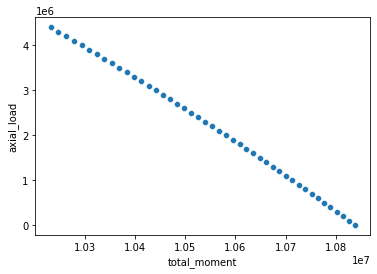

In [76]:
sns.scatterplot(
    data = interaction_table[interaction_table.axial_load < 0.45e7],
    y = 'axial_load',
    x = 'total_moment'
)